Se planea hacer un modelo predictivo utilizando tecnicas de machine learning para la prediccion de:

La probabilidad estadistica con base en un perfil de usuario especifico de que ocurra, cierta tipologia de delito en una zona específica de la ciudad del municipio de Bucaramanga, Santander, Colombia.

y, tomando en cuenta el rango horario y el dia de la semana se va a predecir.




LIBRERIAS A USAR

In [2]:

# Pandas para manejo de datos
import pandas as pd


# MatplotLib para grafos
import matplotlib.pyplot as plt

# Seaborn para grafos
import seaborn as sns

# Numpy para manejo de datos
import numpy as np
from numpy import dtype
#from scipy.sparse.csgraph import depth_first_tree

# MinMaxScaler para normalizacion de datos
#from sklearn.preprocessing import MinMaxScaler

CARGAR DATOS

In [3]:
        # Url de los datos 
url = "https://drive.google.com/uc?id=1-d1pn2OhZeaqiuUNtr6zAIXyXTHo3X7s&export=download"

# Convertir a DataFrame con pandas
df = pd.read_csv(url, low_memory=False)


EDA DE LA TABLA PRINCIPAL


///////////////////// TABLA ////////////////////////////////////

In [4]:
# Mostra el tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DESCRIPCION_CONDUCTA  100993 non-null  object
 1   ARMAS_MEDIOS          100993 non-null  object
 2   BARRIOS_HECHO         100993 non-null  object
 3   FECHA_HECHO           100993 non-null  object
 4   HORA_HECHO            100993 non-null  object
 5   EDAD                  100360 non-null  object
 6   SEXO                  100993 non-null  object
 7   MOVIL_VICTIMA         100993 non-null  object
 8   MOVIL_AGRESOR         100993 non-null  object
 9   CLASE_SITIO           100993 non-null  object
 10  ARTICULO              100993 non-null  object
 11  DELITO_SOLO           100993 non-null  object
 12  CURSO_VIDA            100993 non-null  object
 13  CURSO_VIDA_ORDEN      100993 non-null  int64 
 14  AÑO_NUM               100993 non-null  int64 
 15  MES_NUM          

In [5]:
# Mostrar las primeras filas del DataFrame
df.head()


,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,SEXO,MOVIL_VICTIMA,MOVIL_AGRESOR,CLASE_SITIO,...,DIA_NUM,RANGO_HORARIO,TIPOLOGÍA,RANGO_HORARIO_ORDEN,DIA_NOMBRE,DIA_NOMBRE_ORDEN,LOCALIDAD,NUM_COM,NOM_COM,CANTIDAD_UNICA
0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,20:30:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,17,20:00-20:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,20,lunes,1,11. SUR,11,SUR,1
1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,GRANJAS DE PROVENZA,2019-09-12,01:30:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,1:00-1:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,1,jueves,4,10. PROVENZA,10,PROVENZA,1
2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,2019-04-07,05:10:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,7,5:00-5:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,5,domingo,7,10. PROVENZA,10,PROVENZA,1
3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,23:15:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,30,23:00-23:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,23,miércoles,3,11. SUR,11,SUR,1
4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,2019-06-12,14:30:00,21,MASCULINO,A PIE,A PIE,VIAS PUBLICAS,...,12,14:00-14:59,DELITOS CONTRA EL PATRIMONIO ECONOMICO,14,miércoles,3,10. PROVENZA,10,PROVENZA,1


columnas a quitar: DESCRIPCION_CONDUCTA, ARMAS_MEDIOS,FECHA_HECHO, HORA_HECHO, ARTICULO, DELITO_SOLO, CURSO_VIDA, CURSO_VIDA_ORDEN, AÑO_NUM, MES_NUM, DIA_NUM, RANGO_HORARIA, DIA-NOMBRE, NUM-COM,NOM_COM,CANTIDAD_UNICA

///////////////////// COLUMNAS ////////////////////////////////////


In [6]:
df.columns

Index(['DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'FECHA_HECHO',
       'HORA_HECHO', 'EDAD', 'SEXO', 'MOVIL_VICTIMA', 'MOVIL_AGRESOR',
       'CLASE_SITIO', 'ARTICULO', 'DELITO_SOLO', 'CURSO_VIDA',
       'CURSO_VIDA_ORDEN', 'AÑO_NUM', 'MES_NUM', 'DIA_NUM', 'RANGO_HORARIO',
       'TIPOLOGÍA', 'RANGO_HORARIO_ORDEN', 'DIA_NOMBRE', 'DIA_NOMBRE_ORDEN',
       'LOCALIDAD', 'NUM_COM', 'NOM_COM', 'CANTIDAD_UNICA'],
      dtype='object')

In [7]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} Valores diferentes")

DESCRIPCION_CONDUCTA: 41 Valores diferentes
ARMAS_MEDIOS: 40 Valores diferentes
BARRIOS_HECHO: 327 Valores diferentes
FECHA_HECHO: 2861 Valores diferentes
HORA_HECHO: 1415 Valores diferentes
EDAD: 99 Valores diferentes
SEXO: 3 Valores diferentes
MOVIL_VICTIMA: 14 Valores diferentes
MOVIL_AGRESOR: 15 Valores diferentes
CLASE_SITIO: 231 Valores diferentes
ARTICULO: 30 Valores diferentes
DELITO_SOLO: 41 Valores diferentes
CURSO_VIDA: 19 Valores diferentes
CURSO_VIDA_ORDEN: 19 Valores diferentes
AÑO_NUM: 8 Valores diferentes
MES_NUM: 12 Valores diferentes
DIA_NUM: 31 Valores diferentes
RANGO_HORARIO: 24 Valores diferentes
TIPOLOGÍA: 6 Valores diferentes
RANGO_HORARIO_ORDEN: 24 Valores diferentes
DIA_NOMBRE: 7 Valores diferentes
DIA_NOMBRE_ORDEN: 7 Valores diferentes
LOCALIDAD: 21 Valores diferentes
NUM_COM: 21 Valores diferentes
NOM_COM: 21 Valores diferentes
CANTIDAD_UNICA: 1 Valores diferentes


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CURSO_VIDA_ORDEN,100993.0,7.607795,4.345098,0.0,5.0,6.0,9.0,18.0
AÑO_NUM,100993.0,2019.703197,2.258035,2016.0,2018.0,2020.0,2022.0,2023.0
MES_NUM,100993.0,6.471379,3.425133,1.0,3.0,7.0,9.0,12.0
DIA_NUM,100993.0,15.636490,8.839196,1.0,8.0,16.0,23.0,31.0
RANGO_HORARIO_ORDEN,100993.0,12.512659,6.231053,0.0,8.0,13.0,18.0,23.0
DIA_NOMBRE_ORDEN,100993.0,3.995623,1.977476,1.0,2.0,4.0,6.0,7.0
NUM_COM,100993.0,8.706643,5.272817,1.0,4.0,10.0,13.0,21.0
CANTIDAD_UNICA,100993.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
DESCRIPCION_CONDUCTA,100993,41,ARTÍCULO 239. HURTO PERSONAS,45944
ARMAS_MEDIOS,100993,40,SIN EMPLEO DE ARMAS,46959
BARRIOS_HECHO,100993,327,CENTRO,8532
FECHA_HECHO,100993,2861,2022-09-08,83
HORA_HECHO,100993,1415,10:00:00,3468
EDAD,100360,98,NO DISPONIBLE,8836
SEXO,100993,3,FEMENINO,46749
MOVIL_VICTIMA,100993,14,A PIE,87476
MOVIL_AGRESOR,100993,15,A PIE,77587
CLASE_SITIO,100993,231,VIAS PUBLICAS,49376


In [10]:
missing_values = df.isnull().sum()

# Mostrar el número de valores nulos por columna
print("Número de valores nulos por columna:")
print(missing_values)

Número de valores nulos por columna:
DESCRIPCION_CONDUCTA      0
ARMAS_MEDIOS              0
BARRIOS_HECHO             0
FECHA_HECHO               0
HORA_HECHO                0
EDAD                    633
SEXO                      0
MOVIL_VICTIMA             0
MOVIL_AGRESOR             0
CLASE_SITIO               0
ARTICULO                  0
DELITO_SOLO               0
CURSO_VIDA                0
CURSO_VIDA_ORDEN          0
AÑO_NUM                   0
MES_NUM                   0
DIA_NUM                   0
RANGO_HORARIO             0
TIPOLOGÍA                 1
RANGO_HORARIO_ORDEN       0
DIA_NOMBRE                0
DIA_NOMBRE_ORDEN          0
LOCALIDAD                 0
NUM_COM                   0
NOM_COM                   0
CANTIDAD_UNICA            0
dtype: int64


In [11]:
df.DESCRIPCION_CONDUCTA.unique()

array(['ARTÍCULO 239. HURTO PERSONAS', 'ARTÍCULO 239. HURTO RESIDENCIAS',
       'ARTÍCULO 239. HURTO MOTOCICLETAS',
       'ARTÍCULO 239. HURTO AUTOMOTORES',
       'ARTÍCULO 239. HURTO ENTIDADES COMERCIALES',
       'ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS',
       'ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
       'ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR',
       'ARTÍCULO 120. LESIONES CULPOSAS',
       'ARTÍCULO 206. ACTO SEXUAL VIOLENTO',
       'ARTÍCULO 219 A. UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PARA OFRECER SERVICIOS SEXUALES DE MENORES',
       'ARTÍCULO 205. ACCESO CARNAL VIOLENTO',
       'ARTÍCULO 211. ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR  (CIRCUNSTANCIAS AGRAVACIÓN)',
       'ARTÍCULO 207. ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR',
       'ARTÍCULO 213. INDUCCIÓN A LA PROSTITUCIÓN',
       'ARTÍCULO 210 A. ACOSO SEXUAL',
       'ARTÍCULO 217 A. DEMANDA DE EXPLOTACI

In [12]:
print(f"Categorias y recuento: \n",df.ARMAS_MEDIOS.value_counts())
print("Total de categorias: ",df.ARMAS_MEDIOS.unique().shape)
print("Recuento de valores: ", df.ARMAS_MEDIOS.value_counts().sum())

print("Valores nulos o no reportados:", df.ARMAS_MEDIOS.value_counts()['NO REPORTADO'])

Categorias y recuento: 
 ARMAS_MEDIOS
SIN EMPLEO DE ARMAS                   46959
ARMA BLANCA / CORTOPUNZANTE           20905
CONTUNDENTES                          19160
ARMA DE FUEGO                          7485
LLAVE MAESTRA                          1850
PALANCAS                               1449
VEHICULO                               1149
MOTO                                    655
ESCOPOLAMINA                            500
NO DISPONIBLE                           255
LLAMADA TELEFONICA                      248
REDES SOCIALES                           86
DIRECTA                                  63
PERRO                                    49
ARMA TRAUMATICA                          42
NO REPORTADO                             17
ARTEFACTO INCENDIARIO                    13
ACIDO                                    13
MEDICAMENTOS                             12
CARTA EXTORSIVA                          12
MIXTA                                    10
AGUA CALIENTE                         

Se encuentran valores "nulos" o "no reportados" en la columna armas medio (17 valores) 

In [13]:
print(f"Categorias y recuento: \n",df.BARRIOS_HECHO.value_counts())
print("Total de categorias: ",df.BARRIOS_HECHO.unique().shape)
print("Recuento de valores: ", df.BARRIOS_HECHO.value_counts().sum())

Categorias y recuento: 
 BARRIOS_HECHO
CENTRO                          8532
CABECERA DEL LLANO              5164
SAN FRANCISCO                   4565
LA CONCORDIA                    3545
SAN ALONSO                      2679
                                ... 
EL CONDADO                         1
ASENTAMIENTO NAVAS                 1
AUTOPISTA F/BLANCA-P/CUESTA.       1
VDA. LA ESPERANZA                  1
TEJADOS                            1
Name: count, Length: 327, dtype: int64
Total de categorias:  (327,)
Recuento de valores:  100993


In [14]:
df.FECHA_HECHO.unique()

array(['2019-06-17', '2019-09-12', '2019-04-07', ..., '2023-08-04',
       '2023-10-22', '2023-04-06'], dtype=object)

In [15]:
print(f"Categorias y recuento: \n",df.FECHA_HECHO.value_counts())
print("Total de categorias: ",df.FECHA_HECHO.unique().shape)
print("Recuento de valores: ", df.FECHA_HECHO.value_counts().sum())


Categorias y recuento: 
 FECHA_HECHO
2022-09-08    83
2023-09-09    83
2018-01-01    80
2022-10-10    76
2022-09-09    75
              ..
2020-03-23     5
2020-04-10     5
2020-03-30     5
2020-04-12     4
2020-04-05     4
Name: count, Length: 2861, dtype: int64
Total de categorias:  (2861,)
Recuento de valores:  100993


In [16]:
df.HORA_HECHO.unique()

array(['20:30:00', '01:30:00', '05:10:00', ..., '06:42:00', '23:43:00',
       '04:49:00'], dtype=object)

In [17]:
print(f"Categorias y recuento: \n",df.HORA_HECHO.value_counts())
print("Total de categorias: ",df.HORA_HECHO.unique().shape)
print("Recuento de valores: ", df.HORA_HECHO.value_counts().sum())


Categorias y recuento: 
 HORA_HECHO
10:00:00    3468
08:00:00    2796
20:00:00    2566
19:00:00    2393
09:00:00    2283
            ... 
05:18:00       1
03:16:00       1
03:52:00       1
04:06:00       1
03:49:00       1
Name: count, Length: 1415, dtype: int64
Total de categorias:  (1415,)
Recuento de valores:  100993


In [18]:
df.EDAD.unique()

array(['21', '24', '23', '20', '22', '27', '29', '26', '28', '25', '18',
       '19', '17', '16', '15', '33', '31', '34', '30', '32', '35', '37',
       '39', '38', '36', '49', '46', '47', '45', '48', '40', '43', '44',
       '41', '42', '51', '54', '53', '52', '50', '67', '71', '14', '13',
       '12', '74', '75', 'NO DISPONIBLE', '63', '61', '87', '60', '56',
       '69', '58', '57', '68', '65', '55', '85', '72', '59', '62', '70',
       '79', '78', '5', '9', '66', '73', '64', '81', '77', '2', '0', '82',
       '76', '83', '80', '6', '86', '84', '1', '90', '8', '10', '11', '3',
       '7', '88', '92', '91', '89', '4', '93', '94', '95', nan, '125'],
      dtype=object)

In [19]:
print(f"Categorias y recuento: \n",df.EDAD.value_counts())
print("Total de categorias: ",df.EDAD.unique().shape)
print("Recuento de valores: ", df.EDAD.value_counts().sum())

print("Valores nulos o no reportados:", df.EDAD.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 EDAD
NO DISPONIBLE    8836
30               3176
28               2953
25               2952
26               2943
                 ... 
92                 11
94                  4
93                  3
95                  2
125                 1
Name: count, Length: 98, dtype: int64
Total de categorias:  (99,)
Recuento de valores:  100360
Valores nulos o no reportados: 8836


Reisar las filas con edad no disponible y nan (los valores nan estan arriba)

In [20]:
df.SEXO.unique()

array(['MASCULINO', 'FEMENINO', 'NO DISPONIBLE'], dtype=object)

In [21]:
print(f"Categorias y recuento: \n",df.SEXO.value_counts())
print("Total de categorias: ",df.SEXO.unique().shape)
print("Recuento de valores: ", df.SEXO.value_counts().sum())

print("Valores nulos o no reportados:", df.SEXO.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 SEXO
FEMENINO         46749
MASCULINO        45133
NO DISPONIBLE     9111
Name: count, dtype: int64
Total de categorias:  (3,)
Recuento de valores:  100993
Valores nulos o no reportados: 9111


VALORES NULOS 9111

In [22]:
df.MOVIL_VICTIMA.unique()

array(['A PIE', 'BICICLETA', 'CONDUCTOR MOTOCICLETA', 'PASAJERO TAXI',
       'PASAJERO VEHICULO', 'PASAJERO BUS', 'CONDUCTOR BUS',
       'CONDUCTOR VEHICULO', 'PASAJERO MOTOCICLETA', 'CONDUCTOR TAXI',
       'PASAJERO AERONAVE', 'PASAJERO METRO', 'PASAJERO BARCO',
       'NO DISPONIBLE'], dtype=object)

In [23]:
df.MOVIL_AGRESOR.unique()

array(['A PIE', 'PASAJERO MOTOCICLETA', 'CONDUCTOR MOTOCICLETA',
       'PASAJERO TAXI', 'PASAJERO VEHICULO', 'BICICLETA',
       'CONDUCTOR VEHICULO', 'CONDUCTOR TAXI', 'PASAJERO BUS',
       'CONDUCTOR BUS', 'PASAJERO METRO', 'NO DISPONIBLE',
       'PASAJERO BARCO', 'PASAJERO AERONAVE', 'TRIPULANTE AERONAVE'],
      dtype=object)

In [24]:
print(f"Categorias y recuento: \n",df.MOVIL_AGRESOR.value_counts())
print("Total de categorias: ",df.MOVIL_AGRESOR.unique().shape)
print("Recuento de valores: ", df.MOVIL_AGRESOR.value_counts().sum())

print("Valores nulos o no reportados:", df.MOVIL_AGRESOR.value_counts()['NO DISPONIBLE'])

print(f"Categorias y recuento: \n",df.MOVIL_VICTIMA.value_counts())
print("Total de categorias: ",df.MOVIL_VICTIMA.unique().shape)
print("Recuento de valores: ", df.MOVIL_VICTIMA.value_counts().sum())

print("Valores nulos o no reportados:", df.MOVIL_VICTIMA.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 MOVIL_AGRESOR
A PIE                    77587
CONDUCTOR MOTOCICLETA     9651
PASAJERO MOTOCICLETA      8630
CONDUCTOR VEHICULO        1785
PASAJERO BUS              1692
CONDUCTOR TAXI             523
PASAJERO TAXI              455
BICICLETA                  270
PASAJERO VEHICULO          266
PASAJERO METRO              97
CONDUCTOR BUS               29
NO DISPONIBLE                5
PASAJERO BARCO               1
PASAJERO AERONAVE            1
TRIPULANTE AERONAVE          1
Name: count, dtype: int64
Total de categorias:  (15,)
Recuento de valores:  100993
Valores nulos o no reportados: 5
Categorias y recuento: 
 MOVIL_VICTIMA
A PIE                    87476
CONDUCTOR MOTOCICLETA     4887
CONDUCTOR VEHICULO        3364
PASAJERO BUS              1976
PASAJERO MOTOCICLETA       737
CONDUCTOR TAXI             600
BICICLETA                  568
PASAJERO TAXI              537
PASAJERO VEHICULO          505
CONDUCTOR BUS              206
PASAJERO METRO             121


 valores nulos para moviles agresor 5 y para movil victima 12

In [25]:
df.CLASE_SITIO.unique()

array(['VIAS PUBLICAS', 'PARQUEADERO',
       'FRENTE A RESIDENCIAS - VIA PUBLICA', 'CALLEJÓN',
       'CENTRO RECREACIONAL', 'CENTRO COMERCIAL',
       'INTERIOR VEHICULO PARTICULAR', 'CARRETERA', 'SECTOR RESIDENCIAS',
       'CASAS DE HABITACION', 'HOTELES, RESIDENCIAS, Y SIMILARES.',
       'ALMACENES', 'FRUTERIA', 'COLEGIOS, ESCUELAS', 'BAHIA',
       'SOBRE ANDEN - VIA PUBLICA', 'CONJUNTO RESIDENCIAL',
       'FRENTE OFICINA', 'UNIVERSIDADES', 'VEHICULO',
       'FRENTE A COLEGIO - VIA PUBLICA', 'TALLERES MECANICA',
       'FRENTE EMPRESA - VIA PUBLICA', 'APARTAMENTO EN CONJUNTO CERRADO',
       'SUPERMERCADOS', 'BODEGAS Y SIMILARES',
       'FRENTE A ALMACEN - VIA PUBLICA', 'LAVA-AUTOS',
       'FRENTE CLINICA U HOSPITAL - VIA PUBLICA', 'ZONA DE PARQUEO',
       'TIENDA', 'APARTAMENTO', 'OTRO', 'SECTOR INDUSTRIA',
       'FRENTE A BANCO - VIA PUBLICA', 'IGLESIA',
       'INTERIOR VEHICULO SERVICIO PUBLICO', 'HOGAR DE PASO', 'OFICINAS',
       'EMPRESA', 'SALON COMUNAL', 'CONSTRUC

In [26]:
print(f"Categorias y recuento: \n",df.CLASE_SITIO.value_counts())
print("Total de categorias: ",df.CLASE_SITIO.unique().shape)
print("Recuento de valores: ", df.CLASE_SITIO.value_counts().sum())

print("Valores nulos o no reportados:", df.CLASE_SITIO.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 CLASE_SITIO
VIAS PUBLICAS                         49376
CASAS DE HABITACION                   14440
ALMACENES                              3255
FRENTE A RESIDENCIAS - VIA PUBLICA     2229
CARRETERA                              1967
                                      ...  
ESTABLECIMIENTOS SELLADOS                 1
TEATROS                                   1
ESTACION TRANSMILENIO SENA                1
INTERIOR VEHICULO SITP                    1
NO DISPONIBLE                             1
Name: count, Length: 231, dtype: int64
Total de categorias:  (231,)
Recuento de valores:  100993
Valores nulos o no reportados: 1


Solo un valor nulo 

In [27]:
df.ARTICULO.unique()

array(['ARTÍCULO 239', 'ARTÍCULO 209', 'ARTÍCULO 208', 'ARTÍCULO 229',
       'ARTÍCULO 120', 'ARTÍCULO 206', 'ARTÍCULO 219 A', 'ARTÍCULO 205',
       'ARTÍCULO 211', 'ARTÍCULO 207', 'ARTÍCULO 213', 'ARTÍCULO 210 A',
       'ARTÍCULO 217 A', 'ARTÍCULO 217', 'ARTÍCULO 214', 'ARTÍCULO 210',
       'ARTÍCULO 111', 'ARTÍCULO 244', 'ARTÍCULO 218', 'ARTÍCULO 213 A',
       'ARTÍCULO 103', 'ARTÍCULO 104A', 'ARTÍCULO 125', 'ARTÍCULO 347',
       'ARTÍCULO 343', 'ARTÍCULO 265', 'ARTÍCULO 429', 'ARTÍCULO 350',
       'ARTÍCULO 243', 'ARTÍCULO 109'], dtype=object)

In [29]:
print(f"Categorias y recuento: \n",df.ARTICULO.value_counts())
print("Total de categorias: ",df.ARTICULO.unique().shape)
print("Recuento de valores: ", df.ARTICULO.value_counts().sum())

#print("Valores nulos o no reportados:", df.ARTICULO.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 ARTICULO
ARTÍCULO 239      61481
ARTÍCULO 111      14665
ARTÍCULO 229      13898
ARTÍCULO 347       4209
ARTÍCULO 120       1712
ARTÍCULO 209       1412
ARTÍCULO 103        834
ARTÍCULO 208        607
ARTÍCULO 244        507
ARTÍCULO 205        391
ARTÍCULO 206        247
ARTÍCULO 210        215
ARTÍCULO 109        195
ARTÍCULO 210 A      188
ARTÍCULO 218        109
ARTÍCULO 219 A       95
ARTÍCULO 207         86
ARTÍCULO 213         40
ARTÍCULO 104A        26
ARTÍCULO 211         22
ARTÍCULO 217 A       21
ARTÍCULO 217         10
ARTÍCULO 213 A        6
ARTÍCULO 214          5
ARTÍCULO 343          4
ARTÍCULO 125          3
ARTÍCULO 243          2
ARTÍCULO 265          1
ARTÍCULO 350          1
ARTÍCULO 429          1
Name: count, dtype: int64
Total de categorias:  (30,)
Recuento de valores:  100993


In [30]:
df.DELITO_SOLO.unique()

array(['HURTO PERSONAS', 'HURTO RESIDENCIAS', 'HURTO MOTOCICLETAS',
       'HURTO AUTOMOTORES', 'HURTO ENTIDADES COMERCIALES',
       'ACTOS SEXUALES CON MENOR DE 14 AÑOS',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS',
       'VIOLENCIA INTRAFAMILIAR', 'LESIONES CULPOSAS',
       'ACTO SEXUAL VIOLENTO',
       'UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PARA OFRECER SERVICIOS SEXUALES DE MENORES',
       'ACCESO CARNAL VIOLENTO',
       'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR  (CIRCUNSTANC',
       'ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR',
       'INDUCCIÓN A LA PROSTITUCIÓN', 'ACOSO SEXUAL',
       'DEMANDA DE EXPLOTACION SEXUAL COMERCIAL DE PERSONA MENOR DE 18 AÑOS DE EDAD',
       'ESTÍMULO A LA PROSTITUCIÓN DE MENORES',
       'CONSTREÑIMIENTO A LA PROSTITUCIÓN',
       'ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS DE AGRAVACIÓN)',
       'ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNST

In [31]:
print(f"Categorias y recuento: \n",df.DELITO_SOLO.value_counts())
print("Total de categorias: ",df.DELITO_SOLO.unique().shape)
print("Recuento de valores: ", df.DELITO_SOLO.value_counts().sum())

#print("Valores nulos o no reportados:", df.DELITO_SOLO.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 DELITO_SOLO
HURTO PERSONAS                                                                                     45944
LESIONES PERSONALES                                                                                14665
VIOLENCIA INTRAFAMILIAR                                                                            13898
HURTO ENTIDADES COMERCIALES                                                                         7792
AMENAZAS                                                                                            4209
HURTO MOTOCICLETAS                                                                                  3859
HURTO RESIDENCIAS                                                                                   3743
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )                                                      1662
ACTOS SEXUALES CON MENOR DE 14 AÑOS                                                                 1412
HOMICIDIO         

In [32]:
df.CURSO_VIDA.unique()

array(['20-24', '25-29', '15-19', '30-34', '35-39', '45-49', '40-44',
       '50-54', '65-69', '70-74', '10-14', '75-79', 'NO DISPONIBLE',
       '60-64', '85 o más', '55-59', '5-9', '80-84', '0-4'], dtype=object)

In [33]:
print(f"Categorias y recuento: \n",df.CURSO_VIDA.value_counts())
print("Total de categorias: ",df.CURSO_VIDA.unique().shape)
print("Recuento de valores: ", df.CURSO_VIDA.value_counts().sum())

print("Valores nulos o no reportados:", df.CURSO_VIDA.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 CURSO_VIDA
25-29            14438
20-24            13800
30-34            12668
35-39            10318
NO DISPONIBLE     9470
40-44             8547
15-19             6537
45-49             6509
50-54             5156
55-59             3739
60-64             2458
10-14             2326
65-69             1525
5-9               1044
70-74              911
0-4                574
75-79              522
80-84              275
85 o más           176
Name: count, dtype: int64
Total de categorias:  (19,)
Recuento de valores:  100993
Valores nulos o no reportados: 9470


In [34]:
df.CURSO_VIDA_ORDEN.unique()

array([ 4,  5,  3,  6,  7,  9,  8, 10, 13, 14,  2, 15, 18, 12, 17, 11,  1,
       16,  0])

In [36]:
print(f"Categorias y recuento: \n",df.CURSO_VIDA_ORDEN.value_counts())
print("Total de categorias: ",df.CURSO_VIDA_ORDEN.unique().shape)
print("Recuento de valores: ", df.CURSO_VIDA_ORDEN.value_counts().sum())

#print("Valores nulos o no reportados:", df.CURSO_VIDA_ORDEN.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 CURSO_VIDA_ORDEN
5     14438
4     13800
6     12668
7     10318
18     9470
8      8547
3      6537
9      6509
10     5156
11     3739
12     2458
2      2326
13     1525
1      1044
14      911
0       574
15      522
16      275
17      176
Name: count, dtype: int64
Total de categorias:  (19,)
Recuento de valores:  100993


In [37]:
df.DIA_NUM.unique()

array([17, 12,  7, 30, 16, 23, 28,  2,  1,  9, 21,  8, 13,  4, 20, 14,  3,
       11, 25, 27, 31, 26, 19,  6, 18, 10, 22, 15, 24,  5, 29])

In [39]:
print(f"Categorias y recuento: \n",df.DIA_NUM.value_counts())
print("Total de categorias: ",df.DIA_NUM.unique().shape)
print("Recuento de valores: ", df.DIA_NUM.value_counts().sum())

#print("Valores nulos o no reportados:", df.DIA_NUM.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 DIA_NUM
1     3776
10    3472
15    3438
23    3403
18    3401
9     3401
3     3382
5     3359
14    3356
28    3339
2     3338
24    3334
22    3331
20    3328
8     3310
4     3309
19    3285
27    3280
17    3257
13    3249
6     3241
25    3241
26    3241
16    3212
21    3202
12    3187
7     3182
11    3178
30    3108
29    2882
31    1971
Name: count, dtype: int64
Total de categorias:  (31,)
Recuento de valores:  100993


In [40]:
df.MES_NUM.unique()

array([ 6,  9,  4,  1,  3, 12, 10,  8,  7,  2,  5, 11])

In [42]:
print(f"Categorias y recuento: \n",df.MES_NUM.value_counts())
print("Total de categorias: ",df.MES_NUM.unique().shape)
print("Recuento de valores: ", df.MES_NUM.value_counts().sum())

#print("Valores nulos o no reportados:", df.MES_NUM.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 MES_NUM
9     9144
10    8869
8     8787
7     8698
1     8585
2     8518
3     8496
5     8456
6     8194
12    7849
4     7816
11    7581
Name: count, dtype: int64
Total de categorias:  (12,)
Recuento de valores:  100993


In [43]:
df.TIPOLOGÍA.unique()

array(['DELITOS CONTRA EL PATRIMONIO ECONOMICO',
       'DELITOS CONTRA LA LIBERTAD, INTEGRIDAD Y FORMACION SEXUALES',
       'DELITOS CONTRA LA FAMILIA',
       'DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL',
       'DELITOS CONTRA LA SEGURIDAD PUBLICA', nan], dtype=object)

In [45]:
print(f"Categorias y recuento: \n",df.TIPOLOGÍA.value_counts())
print("Total de categorias: ",df.TIPOLOGÍA.unique().shape)
print("Recuento de valores: ", df.TIPOLOGÍA.value_counts().sum())

#print("Valores nulos o no reportados:", df.TIPOLOGÍA.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 TIPOLOGÍA
DELITOS CONTRA EL PATRIMONIO ECONOMICO                         61990
DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL                17436
DELITOS CONTRA LA FAMILIA                                      13898
DELITOS CONTRA LA SEGURIDAD PUBLICA                             4214
DELITOS CONTRA LA LIBERTAD, INTEGRIDAD Y FORMACION SEXUALES     3454
Name: count, dtype: int64
Total de categorias:  (6,)
Recuento de valores:  100992


In [46]:
df.RANGO_HORARIO_ORDEN.unique()

array([20,  1,  5, 23, 14, 18,  4, 22, 16, 19,  8, 15,  6, 11, 12, 10, 21,
        3,  9, 13,  2, 17,  7,  0])

In [48]:
print(f"Categorias y recuento: \n",df.RANGO_HORARIO_ORDEN.value_counts())
print("Total de categorias: ",df.RANGO_HORARIO_ORDEN.unique().shape)
print("Recuento de valores: ", df.RANGO_HORARIO_ORDEN.value_counts().sum())

#print("Valores nulos o no reportados:", df.RANGO_HORARIO_ORDEN.value_counts()['NO DISPONIBLE'])

Categorias y recuento: 
 RANGO_HORARIO_ORDEN
10    7312
11    6142
19    5946
8     5645
20    5619
18    5493
9     5389
16    5111
15    5014
17    4996
14    4629
12    4400
21    4125
13    4073
7     3635
0     3627
22    3305
6     2713
23    2589
2     2503
1     2501
3     2348
5     1979
4     1899
Name: count, dtype: int64
Total de categorias:  (24,)
Recuento de valores:  100993


In [49]:
features_numericos=df.select_dtypes(["int","float"]).columns
print(features_numericos)
features_categoricos=df.select_dtypes("object").columns
print(features_categoricos)

Index(['CURSO_VIDA_ORDEN', 'AÑO_NUM', 'MES_NUM', 'DIA_NUM',
       'RANGO_HORARIO_ORDEN', 'DIA_NOMBRE_ORDEN', 'NUM_COM', 'CANTIDAD_UNICA'],
      dtype='object')
Index(['DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'FECHA_HECHO',
       'HORA_HECHO', 'EDAD', 'SEXO', 'MOVIL_VICTIMA', 'MOVIL_AGRESOR',
       'CLASE_SITIO', 'ARTICULO', 'DELITO_SOLO', 'CURSO_VIDA', 'RANGO_HORARIO',
       'TIPOLOGÍA', 'DIA_NOMBRE', 'LOCALIDAD', 'NOM_COM'],
      dtype='object')


C:\Users\Owner\AppData\Local\Temp\ipykernel_7804\1225972884.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


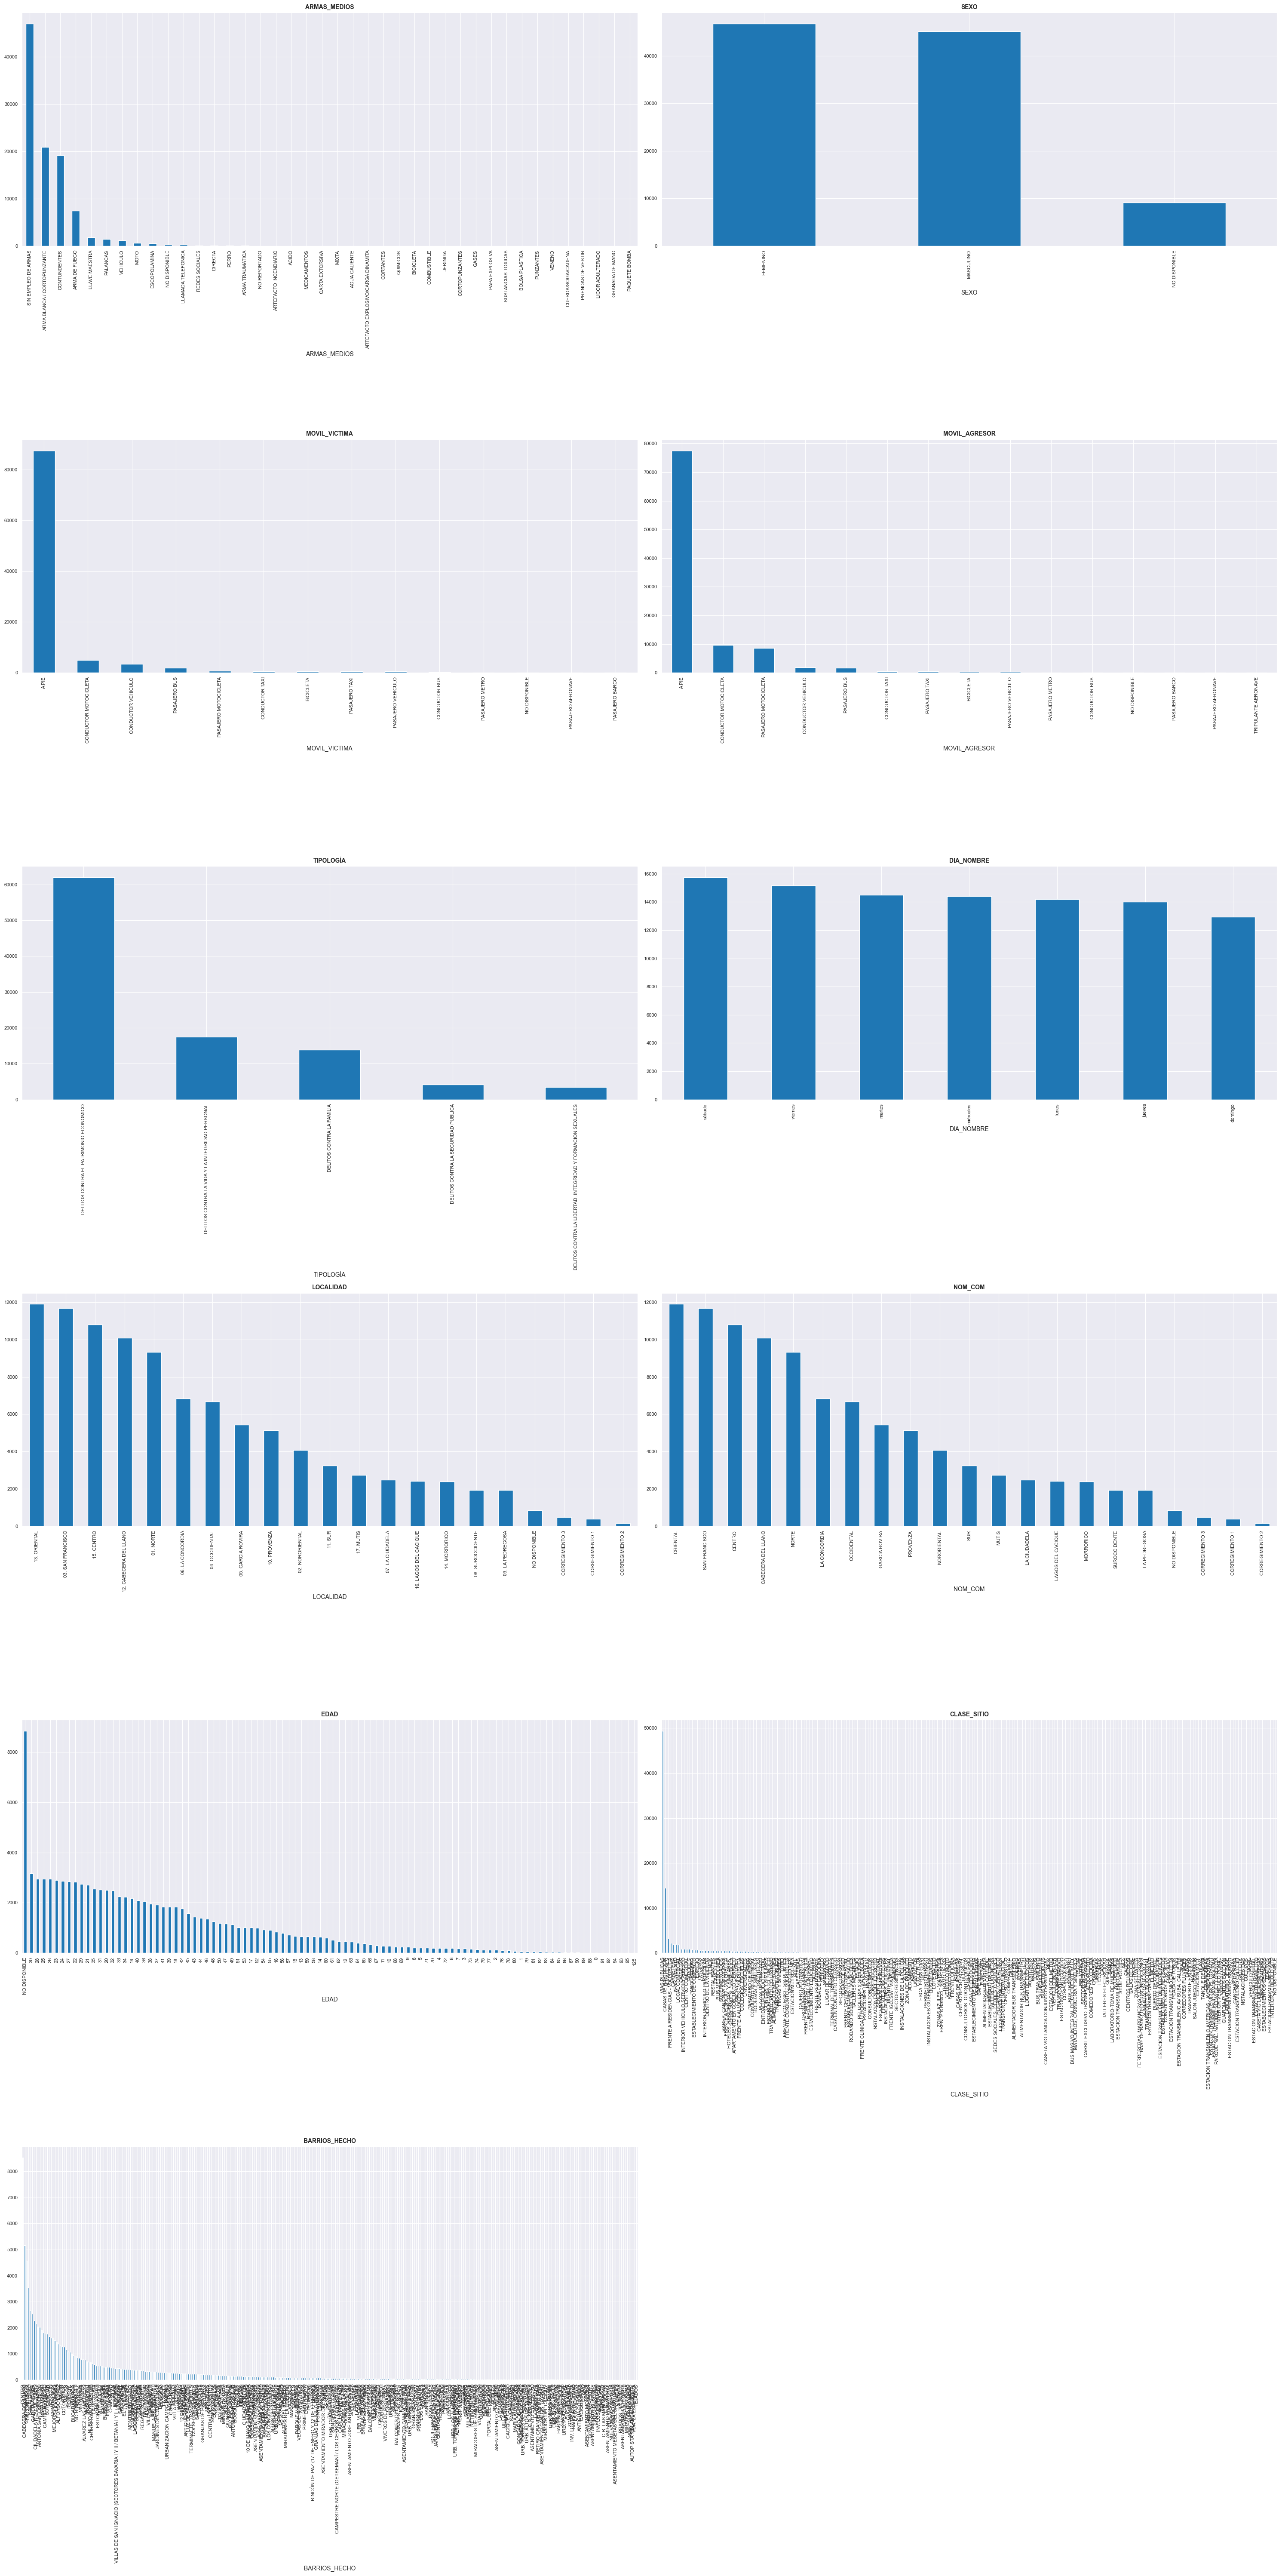

In [50]:
lista=[ 'ARMAS_MEDIOS', 'SEXO', 'MOVIL_VICTIMA', 'MOVIL_AGRESOR',
       'TIPOLOGÍA', 'DIA_NOMBRE', 'LOCALIDAD', 'NOM_COM', 'EDAD','CLASE_SITIO','BARRIOS_HECHO']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 60))
axes = axes.flat  


for i, columna in enumerate(lista):
        variable=df[columna].value_counts()
        variable.plot.bar(ax=axes[i])  
        axes[i].set_title(columna, fontsize=10, fontweight="bold")  
        axes[i].tick_params(labelsize=8) 

fig.tight_layout()

fig.delaxes(axes[11])

# Mostrar la figura con los boxplots
fig.show()

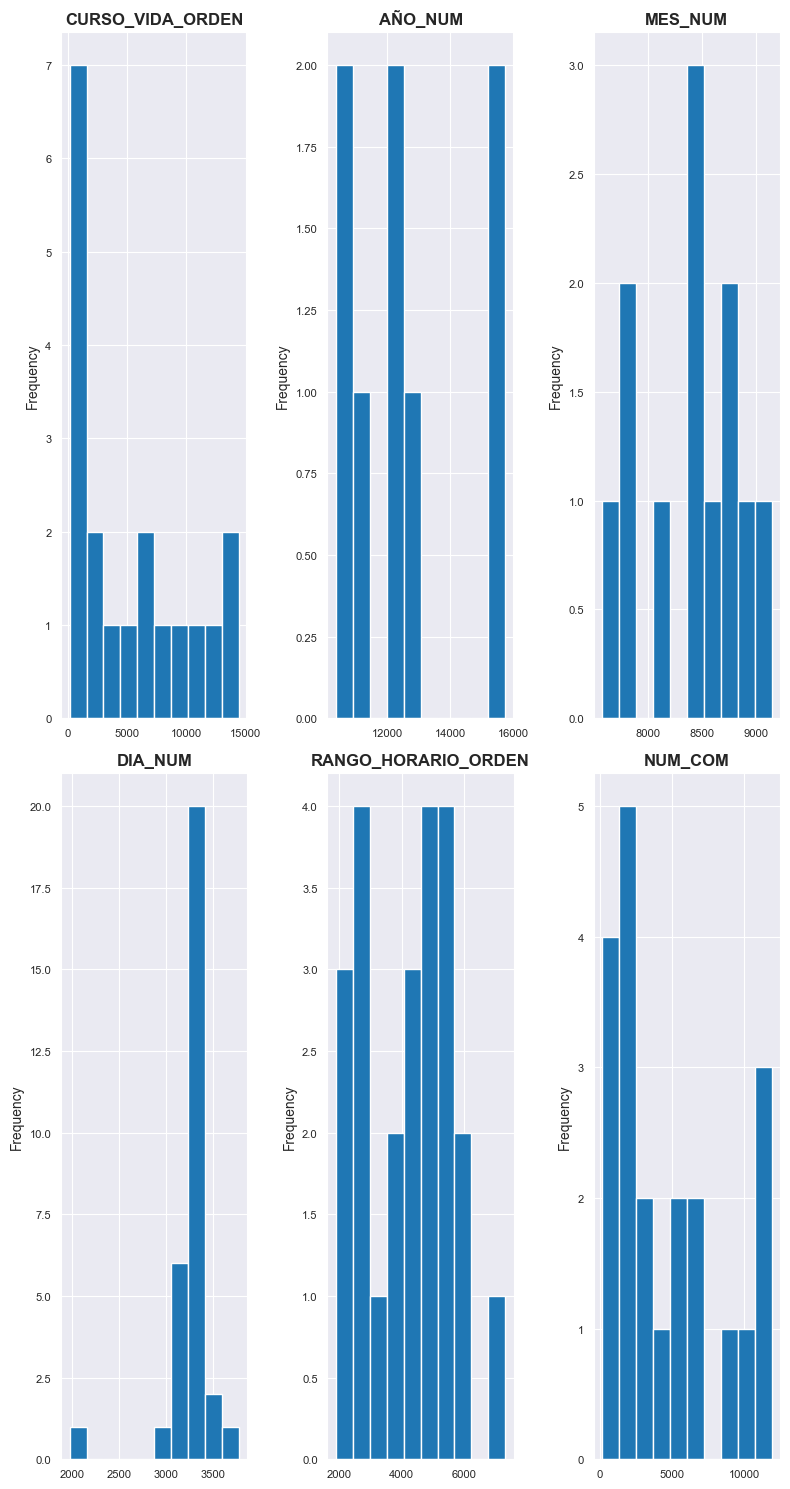

In [51]:
lista= ['CURSO_VIDA_ORDEN', 'AÑO_NUM', 'MES_NUM', 'DIA_NUM',
       'RANGO_HORARIO_ORDEN', 'NUM_COM']
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(8,15))
axes= axes.flat

for i,columna in enumerate(lista):
  variable=df[columna].value_counts()
  variable.plot.hist(ax=axes[i],bins=10)
  axes[i].set_title(columna, fontsize=12,fontweight="bold")
  axes[i].tick_params(labelsize=8)

  fig.tight_layout()


plt.show()

FEATURE ENGINEERING


Se planea quitar descripcion de conducta y enfocar el modelo en la prediccion de la tipologia del crimen, llendo en las categorias planteadas en la columna "TIPOLOGIA" -la fecha del hecho no es importante para el modelo ya que se planea predecir solamente el rango horario en el que fue realizado el crimen y dia de la semana inputada por el usuario se relacionara con las nuevas columnas que se planean hacer las cuales van a ser el agrupamiento y categorizacion de rango horario num y dia num, hora de hecho,rango horario, año num,mes num, dia nombre y dia nombre orden se pueden quitar- y solo dejar rango horario orden y pasar este a que se clasifique madrugada , mañana , tarde y noche, el dia se manejara por el nombre y se le atribuiran valores en el eda para que posteriormente el modelo lo pueda procesar || -curso vida orden- se planea eliminarlo, ya que se van a categorizar los rangos de la edad en "niño" "joven" "adulto" y "adulto mayor"||


Columnas a quitar DESCRIPCION_CONDUCTA, ARMAS_MEDIOS, FECHA_HECHO,
      HORA_HECHO,MOVIL_AGRESOR,
       CLASE_SITIO, ARTICULO, DELITO_SOLO, CURSO_VIDA,
       CURSO_VIDA_ORDEN, AÑO_NUM, RANGO_HORARIO, DIA_NOMBRE, DIA_NOMBRE_ORDEN, CANTIDAD_UNICA,LOCALIDAD,  NUM_COM y NOM_COM

///////////////////// ELIMINACION COLUMNAS ////////////////////////////////////

RECUERDE CREAR UNA NUEVA VARIABLE QUE SE LLAME DF_NORMALIZADA PARA NO MODIFICAR LA TABLA PRINCIPAL

In [52]:
df_normalizada = df

In [53]:


df_normalizada = df_normalizada.drop(['DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS', 'FECHA_HECHO',
      'HORA_HECHO','MOVIL_AGRESOR',
       'CLASE_SITIO', 'ARTICULO', 'DELITO_SOLO', 'CURSO_VIDA',
       'CURSO_VIDA_ORDEN', 'AÑO_NUM', 'RANGO_HORARIO', 'DIA_NOMBRE', 'DIA_NUM', 'CANTIDAD_UNICA','LOCALIDAD',  'NUM_COM' , 'NOM_COM'], axis=1)

///////////////////// TRANSFORMACION DATOS Y COLUMNAS //////////////////////////////////

In [54]:
df_normalizada.head()

,BARRIOS_HECHO,EDAD,SEXO,MOVIL_VICTIMA,MES_NUM,TIPOLOGÍA,RANGO_HORARIO_ORDEN,DIA_NOMBRE_ORDEN
0,MALPASO,21,MASCULINO,A PIE,6,DELITOS CONTRA EL PATRIMONIO ECONOMICO,20,1
1,GRANJAS DE PROVENZA,21,MASCULINO,A PIE,9,DELITOS CONTRA EL PATRIMONIO ECONOMICO,1,4
2,PROVENZA,21,MASCULINO,A PIE,4,DELITOS CONTRA EL PATRIMONIO ECONOMICO,5,7
3,CIUDAD VENECIA,21,MASCULINO,A PIE,1,DELITOS CONTRA EL PATRIMONIO ECONOMICO,23,3
4,PROVENZA,21,MASCULINO,A PIE,6,DELITOS CONTRA EL PATRIMONIO ECONOMICO,14,3


In [55]:
features_numericos_normalizados=df_normalizada.select_dtypes(["int","float"]).columns
print(features_numericos)
features_categoricos_normalizados=df_normalizada.select_dtypes("object").columns
print(features_categoricos)

Index(['CURSO_VIDA_ORDEN', 'AÑO_NUM', 'MES_NUM', 'DIA_NUM',
       'RANGO_HORARIO_ORDEN', 'DIA_NOMBRE_ORDEN', 'NUM_COM', 'CANTIDAD_UNICA'],
      dtype='object')
Index(['DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'FECHA_HECHO',
       'HORA_HECHO', 'EDAD', 'SEXO', 'MOVIL_VICTIMA', 'MOVIL_AGRESOR',
       'CLASE_SITIO', 'ARTICULO', 'DELITO_SOLO', 'CURSO_VIDA', 'RANGO_HORARIO',
       'TIPOLOGÍA', 'DIA_NOMBRE', 'LOCALIDAD', 'NOM_COM'],
      dtype='object')


C:\Users\Owner\AppData\Local\Temp\ipykernel_7804\135827047.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


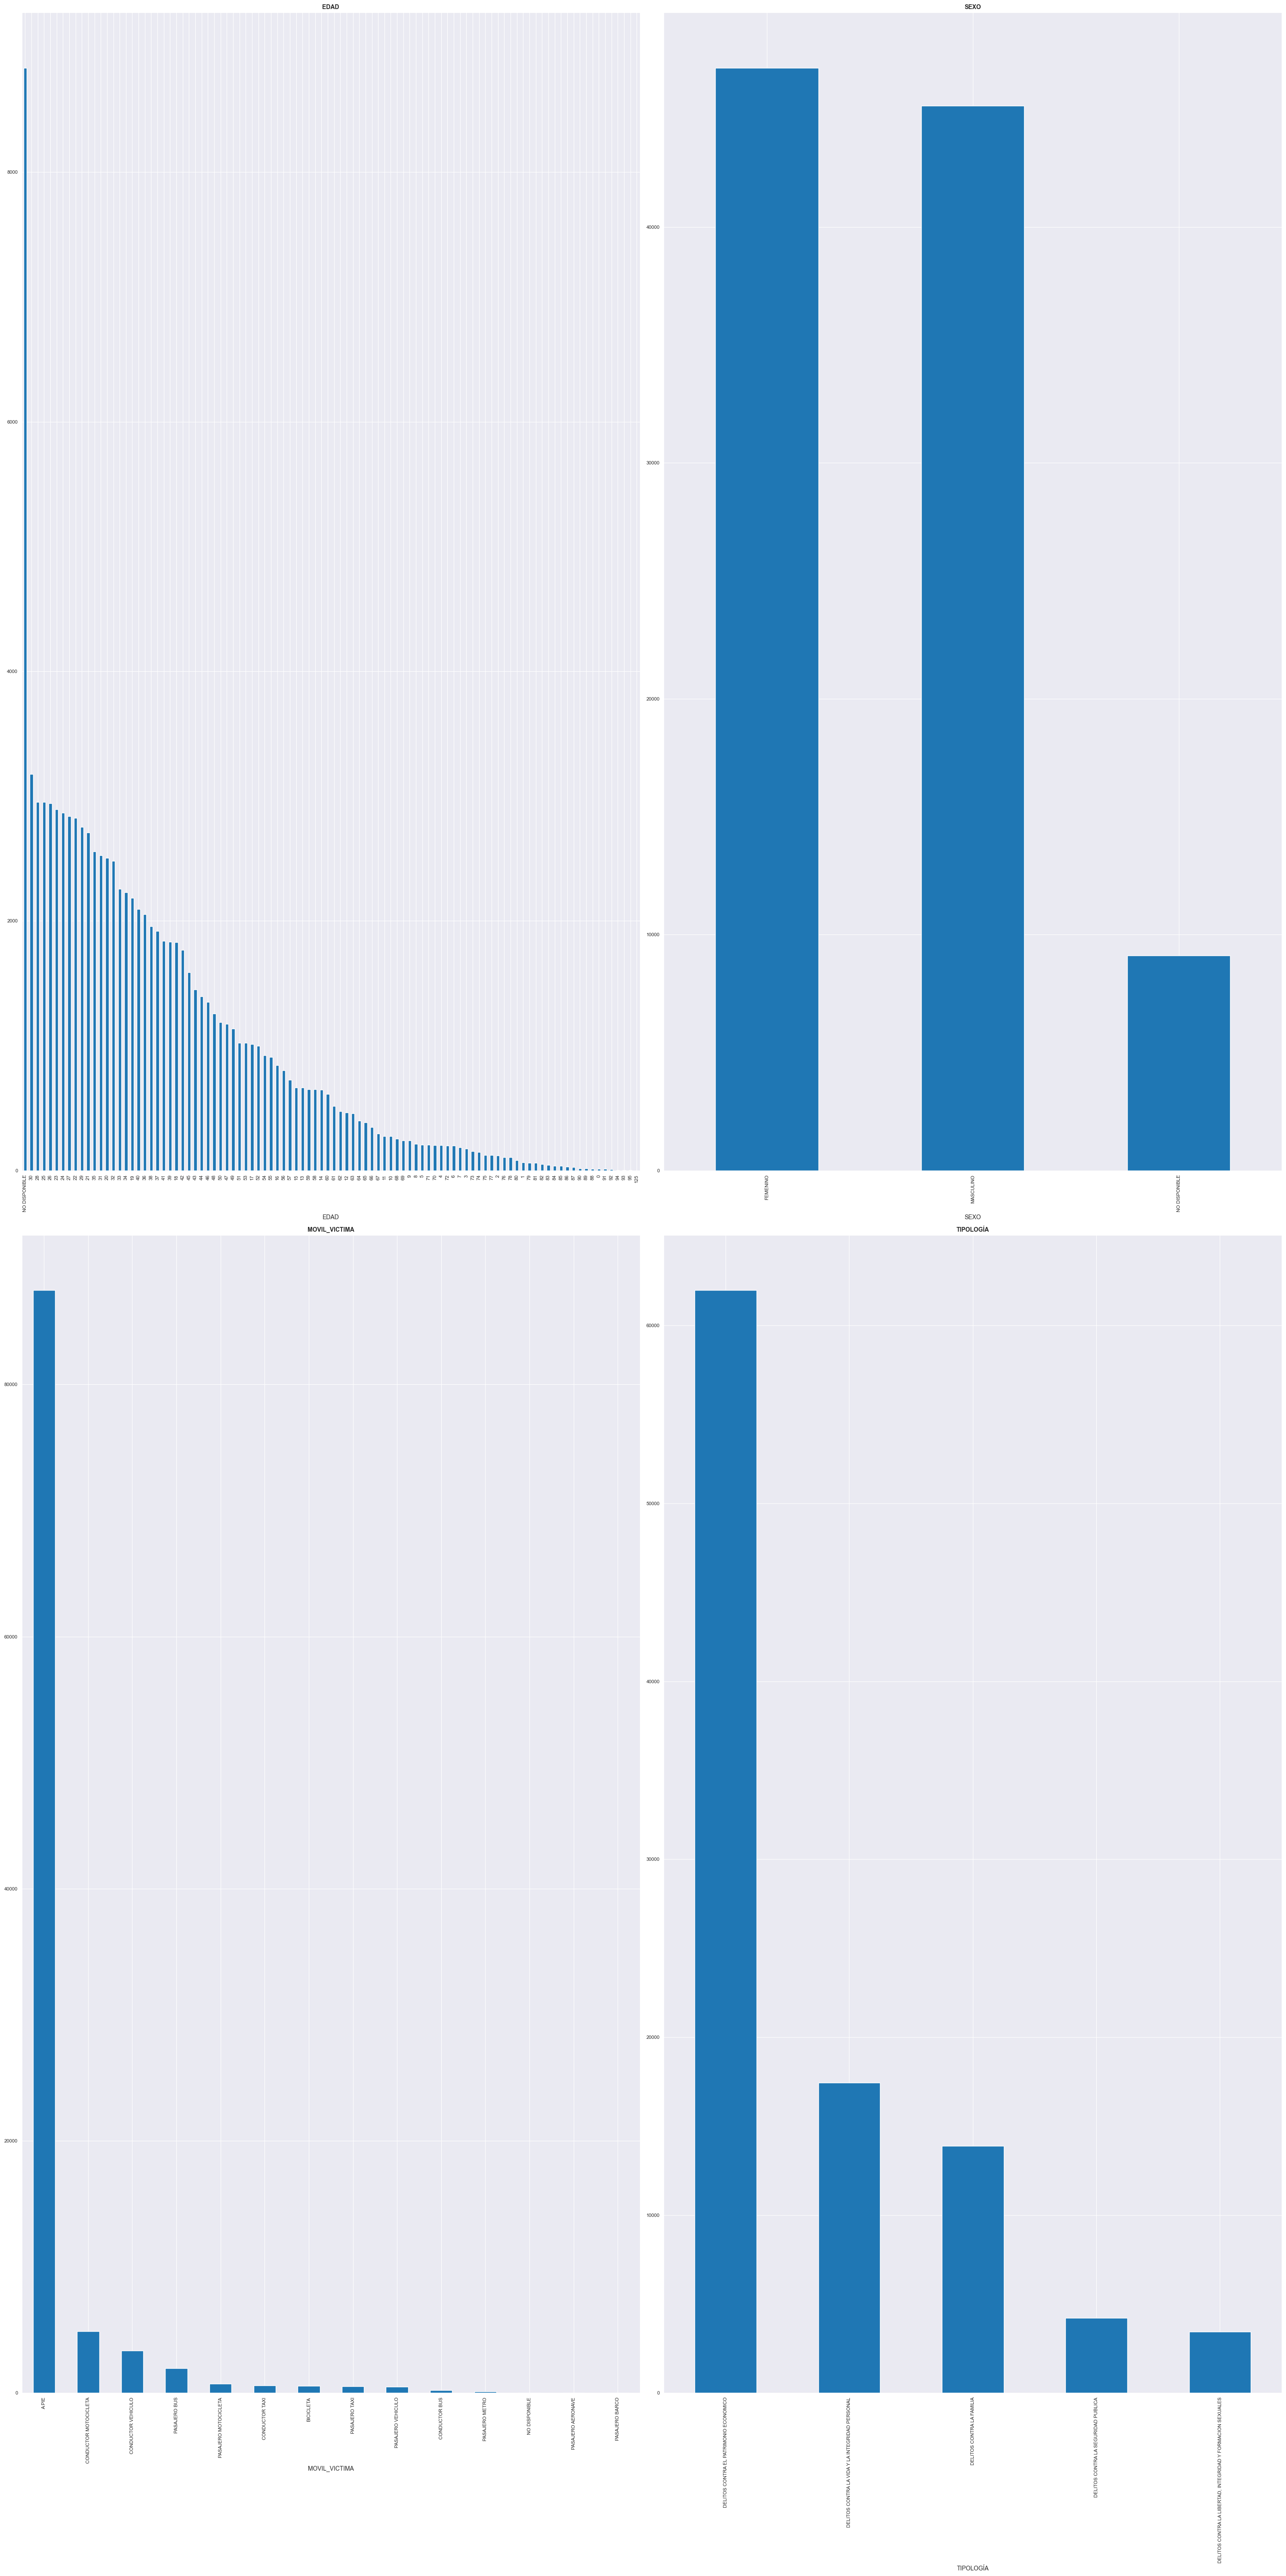

In [56]:
lista= [ 'EDAD', 'SEXO', 'MOVIL_VICTIMA', 'TIPOLOGÍA']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 60))
axes = axes.flat  


for i, columna in enumerate(lista):
        variable=df[columna].value_counts()
        variable.plot.bar(ax=axes[i])  
        axes[i].set_title(columna, fontsize=10, fontweight="bold")  
        axes[i].tick_params(labelsize=8) 

fig.tight_layout()


# Mostrar la figura con los boxplots
fig.show()

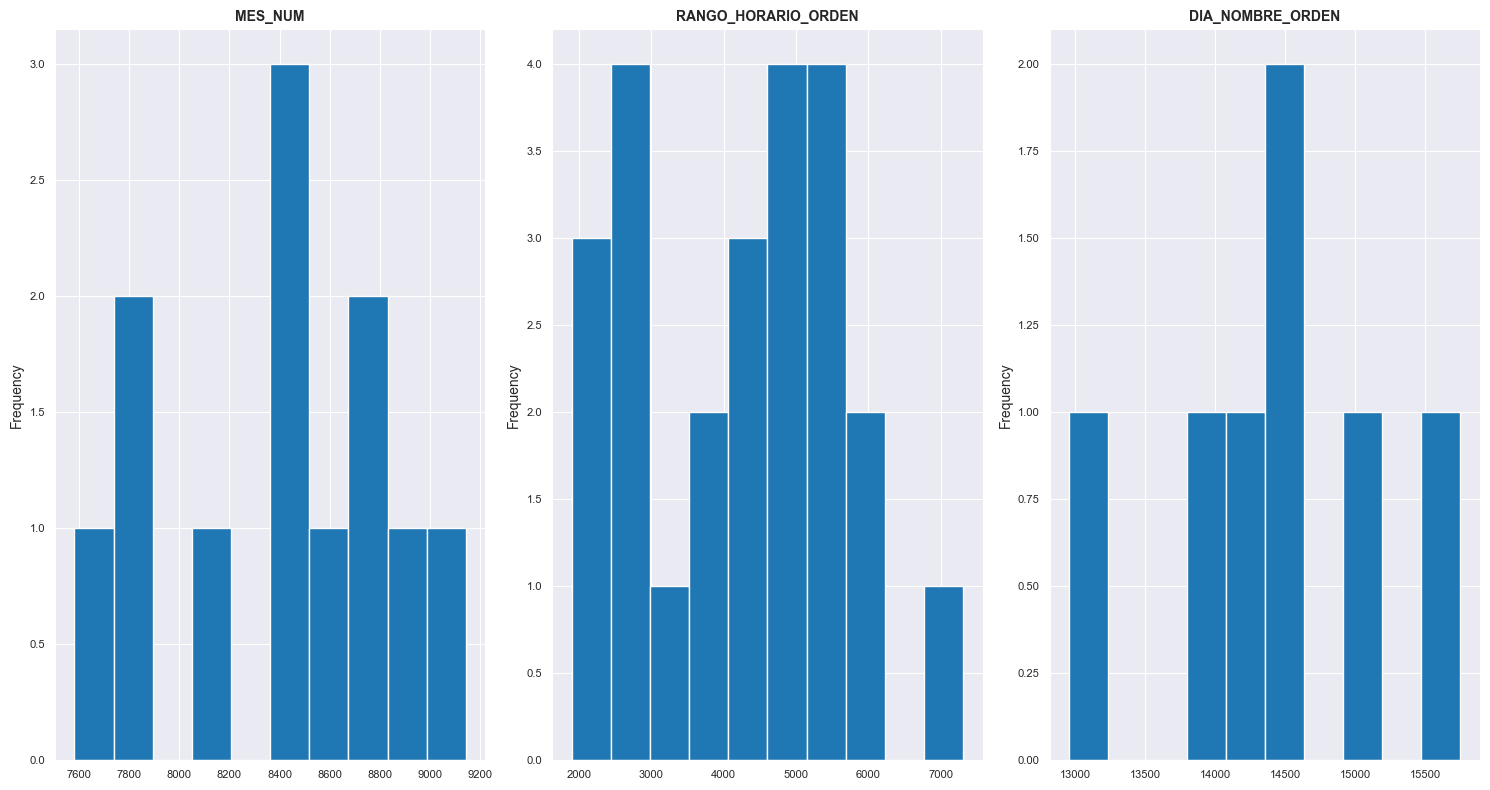

In [57]:
lista= features_numericos_normalizados
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,8))
axes= axes.flat

for i,columna in enumerate(lista):
  variable=df[columna].value_counts()
  variable.plot.hist(ax=axes[i],bins=10)
  axes[i].set_title(columna, fontsize=10,fontweight="bold")
  axes[i].tick_params(labelsize=8)

  fig.tight_layout()


plt.show()

In [58]:
# Reemplaza los valores "NO DISPONIBLES" por NaN para poder procesarlos
df_normalizada['EDAD'] = df_normalizada['EDAD'].replace("NO DISPONIBLES", np.nan)

# Convierte la columna a tipo numérico, forzando los errores a NaN
df_normalizada['EDAD'] = pd.to_numeric(df_normalizada['EDAD'], errors='coerce')

# Reemplaza los NaN con el promedio de la columna sin usar inplace=True
mean_eda = df_normalizada['EDAD'].mean()
df_normalizada['EDAD'] = df_normalizada['EDAD'].fillna(mean_eda)

In [59]:

# Convierte la columna a tipo int
df_normalizada['EDAD'] = df_normalizada['EDAD'].astype(int)

In [60]:
# Función para categorizar las edades
def categorize_age(edad):
    if edad < 13:
        return 'NIÑO'
    elif 13 <= edad < 18:
        return 'JOVEN'
    elif 18 <= edad < 60:
        return 'ADULTO'
    else:
        return 'ADULTO MAYOR'

# Crear la nueva columna categorizada
df_normalizada['EDAD_CATEGORIA'] = df_normalizada['EDAD'].apply(categorize_age)

In [61]:
df_normalizada = df_normalizada.drop(['EDAD'], axis=1)

In [62]:
def categorize_horario(orden):
    if (0 < orden < 6):
        return 'MADRUGADA'
    elif 6 <= orden < 12:
        return 'MAÑANA'
    elif 12 <= orden < 18:
        return 'TARDE'
    else:
        return 'NOCHE'

# Crear la nueva columna categorizada
df_normalizada['HORARIO_CATEGORIZADO'] = df_normalizada['RANGO_HORARIO_ORDEN'].apply(categorize_horario)

In [63]:
df_normalizada = df_normalizada.drop(['RANGO_HORARIO_ORDEN'], axis=1)

In [64]:
# Reemplaza los valores "NO DISPONIBLES" por NaN temporalmente para calcular la moda
df_normalizada['SEXO'] = df_normalizada['SEXO'].replace('NO DISPONIBLE', np.nan)

# Calcula la moda de los valores válidos (excluyendo los NaN)
mode_sexo = df_normalizada['SEXO'].mode()[0]

# Reemplaza los valores NaN (que antes eran "NO DISPONIBLE") con la moda
df_normalizada['SEXO'] = df_normalizada['SEXO'].fillna(mode_sexo)

In [65]:
df_normalizada['MOVIL_VICTIMA'] = df_normalizada['MOVIL_VICTIMA'].replace('NO DISPONIBLE', 'A PIE')
df_normalizada['MOVIL_VICTIMA'] = df_normalizada['MOVIL_VICTIMA'].replace('PASAJERO BARCO', 'A PIE')
df_normalizada['MOVIL_VICTIMA'] = df_normalizada['MOVIL_VICTIMA'].replace('PASAJERO AERONAVE', 'A PIE')
df_normalizada['MOVIL_VICTIMA'] = df_normalizada['MOVIL_VICTIMA'].replace('PASAJERO METRO', 'PASAJERO BUS')

In [66]:
df_normalizada.MOVIL_VICTIMA.unique()

array(['A PIE', 'BICICLETA', 'CONDUCTOR MOTOCICLETA', 'PASAJERO TAXI',
       'PASAJERO VEHICULO', 'PASAJERO BUS', 'CONDUCTOR BUS',
       'CONDUCTOR VEHICULO', 'PASAJERO MOTOCICLETA', 'CONDUCTOR TAXI'],
      dtype=object)

In [67]:
columnas_numericas=df_normalizada.select_dtypes(include=["int64","float64","int32"]).columns
columnas_numericas

Index(['MES_NUM', 'DIA_NOMBRE_ORDEN'], dtype='object')

In [68]:
# Recorrer todas las columnas numéricas para mostrar sus cuantiles (Q1, Q2, Q3)
for i, columna in enumerate(columnas_numericas):
    # Calcular los cuantiles 25%, 50% (mediana) y 75% para la columna actual
    cuantiles = df_normalizada[columna].quantile([0.25, 0.5, 0.75])

    # Imprimir el nombre de la columna
    print(columna)

    # Imprimir los cuantiles calculados
    print(cuantiles, "\n\n")

MES_NUM
0.25    3.0
0.50    7.0
0.75    9.0
Name: MES_NUM, dtype: float64 


DIA_NOMBRE_ORDEN
0.25    2.0
0.50    4.0
0.75    6.0
Name: DIA_NOMBRE_ORDEN, dtype: float64 




IndexError: index 11 is out of bounds for axis 0 with size 2

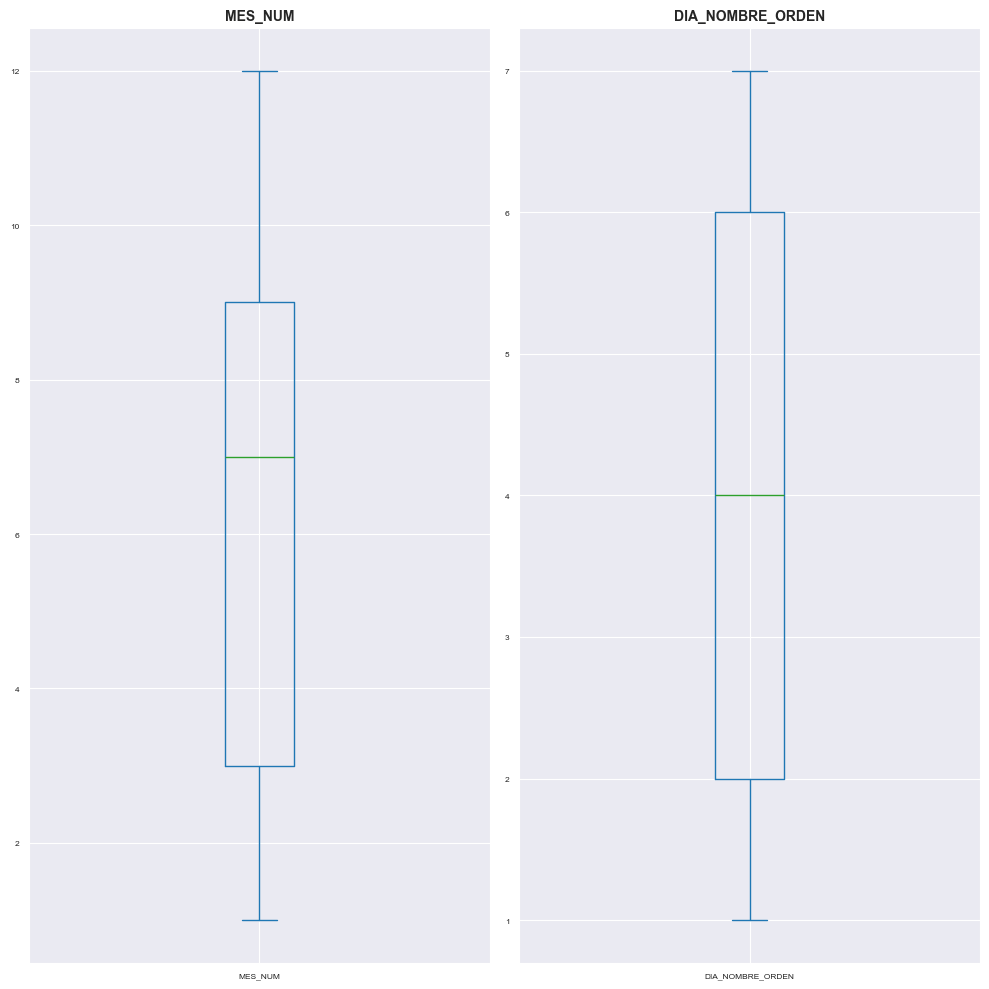

In [69]:
def outlier(df_normalizada,columnas_numericas):
  fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
  axes=axes.flat

  for i,columna in  enumerate(columnas_numericas):
    df_normalizada[columna].plot.box(ax=axes[i])
    axes[i].set_title(columna,fontsize=10,fontweight="bold")
    axes[i].tick_params(labelsize=6)

  fig.tight_layout()
  fig.delaxes(axes[11])
  return
outlier(df_normalizada,columnas_numericas)

In [70]:
df_normalizada.columns

Index(['BARRIOS_HECHO', 'SEXO', 'MOVIL_VICTIMA', 'MES_NUM', 'TIPOLOGÍA',
       'DIA_NOMBRE_ORDEN', 'EDAD_CATEGORIA', 'HORARIO_CATEGORIZADO'],
      dtype='object')

In [192]:
df_normalizada.head()

,BARRIOS_HECHO,SEXO,MOVIL_VICTIMA,MES_NUM,TIPOLOGÍA,DIA_NOMBRE_ORDEN,EDAD_CATEGORIA,HORARIO_CATEGORIZADO
0,MALPASO,MASCULINO,A PIE,6,DELITOS CONTRA EL PATRIMONIO ECONOMICO,1,ADULTO,NOCHE
1,GRANJAS DE PROVENZA,MASCULINO,A PIE,9,DELITOS CONTRA EL PATRIMONIO ECONOMICO,4,ADULTO,MADRUGADA
2,PROVENZA,MASCULINO,A PIE,4,DELITOS CONTRA EL PATRIMONIO ECONOMICO,7,ADULTO,MADRUGADA
3,CIUDAD VENECIA,MASCULINO,A PIE,1,DELITOS CONTRA EL PATRIMONIO ECONOMICO,3,ADULTO,NOCHE
4,PROVENZA,MASCULINO,A PIE,6,DELITOS CONTRA EL PATRIMONIO ECONOMICO,3,ADULTO,TARDE


///////////////////// NORMALIZACION DE DATOS ////////////////////////////////////

Se aplica one-hot encoding a las columnas ARMAS_MEDIOS, BARRIOS_HECHO, DIA_SEMANA, DESCRIPCION_CONDUCTA, CLASIFICACIONES DELITO, MOVIL_AGRESOR, MOVIL_VICTIMA

In [26]:
df_normalizada = pd.get_dummies(df_normalizada, columns=[
    'ARMAS_MEDIOS',
    'BARRIOS_HECHO',
    'DIA_SEMANA',
    'DESCRIPCION_CONDUCTA',
    'CLASIFICACIONES_DELITO',
    'MOVIL_AGRESOR',
    'MOVIL_VICTIMA'
], drop_first=True)



EDA TABLA NORMALIZADA

In [80]:
df_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   BARRIOS_HECHO        100993 non-null  object
 1   EDAD                 100360 non-null  object
 2   SEXO                 100993 non-null  object
 3   MOVIL_VICTIMA        100993 non-null  object
 4   MES_NUM              100993 non-null  int64 
 5   DIA_NUM              100993 non-null  int64 
 6   TIPOLOGÍA            100992 non-null  object
 7   RANGO_HORARIO_ORDEN  100993 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 6.2+ MB


In [36]:
df_normalizada.value_counts('CATEGORIA_SEGURIDAD')

CATEGORIA_SEGURIDAD
Moderada seguridad    35362
Alta seguridad        34155
Baja seguridad        31462
Name: count, dtype: int64

In [57]:
df_normalizada.BARRIO.value_counts()

BARRIO
CENTRO                11199
SAN FRANCISCO          5944
CABECERA DEL LLANO     5794
LA CONCORDIA           5078
PROVENZA               3447
                      ...  
CAMPO GALAN               1
EL CENTRO                 1
EL PROGRESO               1
VILLABEL                  1
CAMPESTRE                 1
Name: count, Length: 483, dtype: int64

In [35]:
df_normalizada['TOTAL_INCIDENTES'].describe()


count    135076.000000
mean       2685.199754
std        3064.885586
min           1.000000
25%         536.000000
50%        1698.000000
75%        3441.000000
max       11199.000000
Name: TOTAL_INCIDENTES, dtype: float64

In [56]:
df_normalizada['TOTAL_INCIDENTES'].value_counts()

TOTAL_INCIDENTES
11199    11199
5944      5944
5794      5794
5078      5078
3447      3447
         ...  
29          29
14          28
26          26
6           24
22          22
Name: count, Length: 222, dtype: int64

FEATURE ENGINEERING PARA LA TABLA NORMALIZADA

In [33]:
barrios_columns = df_normalizada.filter(like='BARRIOS_HECHO_').columns
df_normalizada['BARRIO'] = df_normalizada[barrios_columns].idxmax(axis=1).str.replace('BARRIOS_HECHO_', '')


# Contar el número de incidentes por barrio
incidentes_por_barrio = df_normalizada['BARRIO'].value_counts().reset_index()
incidentes_por_barrio.columns = ['BARRIO', 'TOTAL_INCIDENTES']

# Unir este conteo de incidentes con el DataFrame original
df_normalizada = df_normalizada.merge(incidentes_por_barrio, on='BARRIO', how='left')

# Crear la columna CATEGORIA_SEGURIDAD basada en los umbrales de incidentes
df_normalizada['CATEGORIA_SEGURIDAD'] = pd.cut(df_normalizada['TOTAL_INCIDENTES'],
                                               bins=[536, 1698, 3441, float('inf')],
                                               labels=['Alta seguridad', 'Moderada seguridad', 'Baja seguridad'])

# Verificar los primeros resultados
df_normalizada[['BARRIO', 'TOTAL_INCIDENTES', 'CATEGORIA_SEGURIDAD']].head()






,BARRIO,TOTAL_INCIDENTES,CATEGORIA_SEGURIDAD
0,BUENOS AIRES,588,Alta seguridad
1,CAMPO HERMOSO,2784,Moderada seguridad
2,CAMPO HERMOSO,2784,Moderada seguridad
3,COMUNEROS,2235,Moderada seguridad
4,GIRARDOT,2608,Moderada seguridad


<Axes: ylabel='Frequency'>

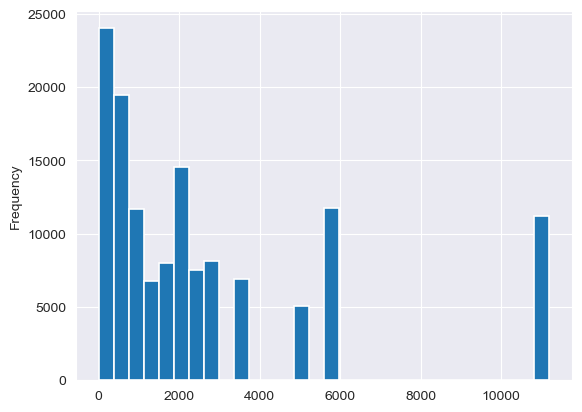

In [63]:
df_normalizada.TOTAL_INCIDENTES.plot.hist(bins=30, edgecolor='white', linewidth=1.2)